<a href="https://colab.research.google.com/github/himanshu3103/PyTorch/blob/main/Pytorch_Workflow_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow
**Resources:**
1. [Mrdbourke's Github for this notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb)
2. [torch.nn](https://pytorch.org/docs/stable/nn.html)
3. [Linear Regression](http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm#:~:text=A%20linear%20regression%20line%20has,y%20when%20x%20%3D%200)
4. [nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html)
5. [Pytorch Cheat Sheet](https://pytorch.org/tutorials/beginner/ptcheat.html)
6. [PyTorch Inference Mode](https://twitter.com/PyTorch/status/1437838231505096708)
7. [PyTorch Loss Function](https://pytorch.org/docs/stable/nn.html#loss-functions)
8. [PyTorch Optimizer](https://pytorch.org/docs/stable/optim.html)
9. [Saving and Loading Model](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-and-loading-models)

In [1]:
Workflow = {1: "data (prepare and load)",
            2: "build model",
            3: "fitting the model to the data (training)",
            4: "making predictions and evaluating the model (inference)",
            5: "saving and loading a model",
            6: "putting it all together"
            }
Workflow

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to the data (training)',
 4: 'making predictions and evaluating the model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn #[2]
import matplotlib.pyplot as plt

#Check pytorch version
torch.__version__

'2.0.0+cu118'

## 1. Data (Preparing and Loading)
There are two parts to machine learning :
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

Let's create some *known* data using linear regression. ($ y = aX+b $)

In [3]:
#Creating known parameters
weight = 0.6
bias = 0.6

#Create
start = 0
end = 1
step = 0.01
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias
print(f"First 10 values of X: {X[:10]}")
print(f"First 10 values of y: {y[:10]}")
print(f"Len of X: {len(X)} and len of y: {len(y)}")

First 10 values of X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
First 10 values of y: tensor([[0.6000],
        [0.6060],
        [0.6120],
        [0.6180],
        [0.6240],
        [0.6300],
        [0.6360],
        [0.6420],
        [0.6480],
        [0.6540]])
Len of X: 100 and len of y: 100


### Splitting data into training and test sets


In [4]:
#Create test and train split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

Visualizing the data

In [5]:
def plot_predictions(train_data = X_train, 
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10,7))

  #Plot training data in red
  plt.scatter(train_data, train_labels, c='r', s=4, label="Training data")

  #Plot test data in blue
  plt.scatter(test_data, test_labels, c='b', s=4, label="Testing data")

  #If predictions exists
  if predictions is not None:
    plt.scatter(test_data, predictions, c="g",s=4,label="Predictions")
  
  #Show the legend
  plt.legend(prop={"size": 14})



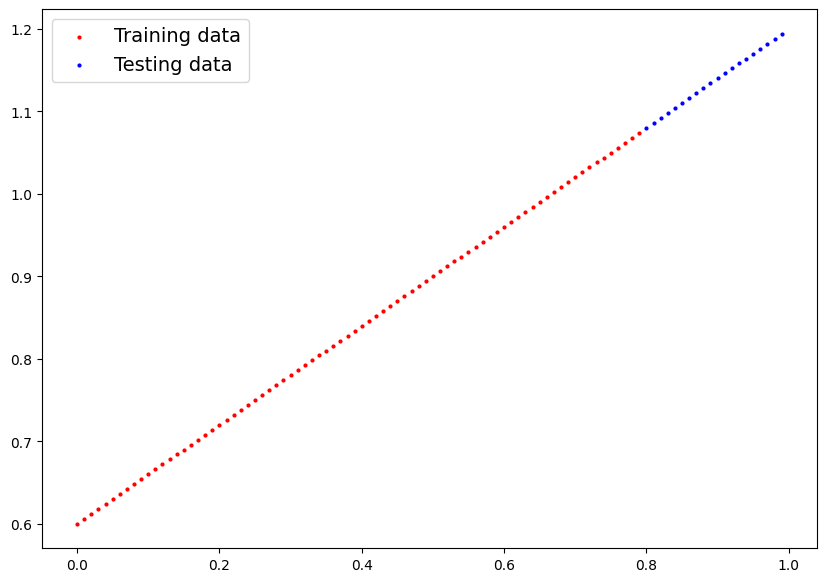

In [6]:
plot_predictions()

## 2. Building our first model
1. Start with random weights and bias
2. Update the weights and biases based on the training data

Two main algorithms used:
1. Gradient Descent
2. Backpropagation

In [54]:
 # Create linear regression model class
class LinearRegressionModel(nn.Module): #nn.Module contains all the building block for neural networks
  def __init__(self):
    super().__init__()
    #Initialize model parameters
    self.weights = nn.Parameter(torch.rand(1,
                                           requires_grad = True, #Pytorch will track the gradients of this specific parameter for use with torch.autograd
                                           dtype = torch.float))
    self.bias = nn.Parameter(torch.rand(1,
                                        requires_grad = True,
                                        dtype = torch.float))
  #Forward Method -> defines the forward computation of the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # x->input data
    return self.weights*x + self.bias #linear regression model

### Pytorch Model building essentials
* torch.nn - contains all the building blocks for computational graphs
* torch.nn.Parameter - what parameters should our model try and learn
* torch.nn.Module - the base class for all neural networks modules
* torch.optim - package implementing various optimization algorithms
* torch.utils.data.Dataset - Represents a map between key(label) and sample (features) pairs of your data. Such as images and associated labels
* torch.utils.data.Dataloader - Creates a Python iterable over a torch Dataset


### Checking the contents of the PyTorch model
We can do it using `.parameters()`

In [55]:
torch.manual_seed(42)

#Creating an instance of our model
model_0 = LinearRegressionModel()

#Checking the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [56]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

### Making predictions using `torch.inference_mode()`

In [47]:
# Make predictions
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[1.6208],
        [1.6296],
        [1.6385],
        [1.6473],
        [1.6561],
        [1.6649],
        [1.6738],
        [1.6826],
        [1.6914],
        [1.7002],
        [1.7090],
        [1.7179],
        [1.7267],
        [1.7355],
        [1.7443],
        [1.7532],
        [1.7620],
        [1.7708],
        [1.7796],
        [1.7885]])

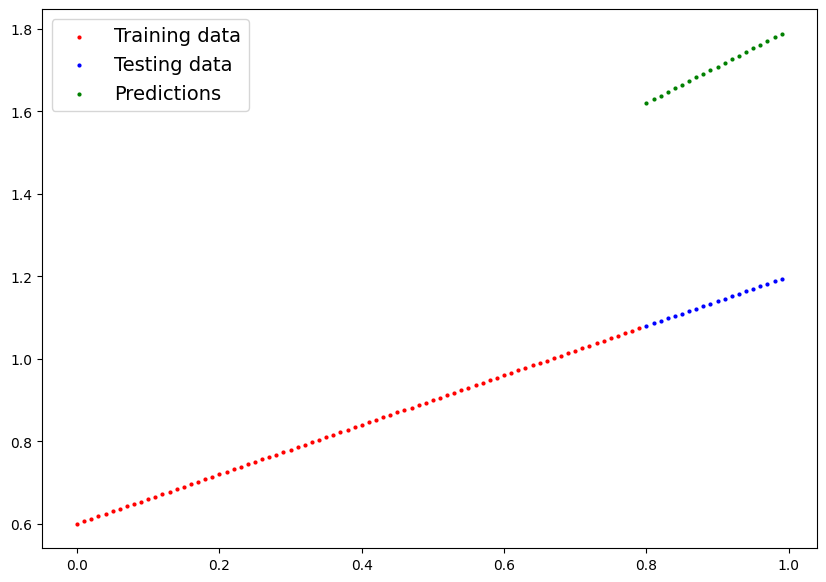

In [11]:
plot_predictions(predictions = y_preds)

## 3. Train Model
Things we need to train:
* **Loss Function:** Loss is the penalty for a bad prediction. Loss is a number indicating how bad the model's prediction was on a single example.
* **Optimizer:** An optimizer is an algorithm or function that adapts the neural network's attributes, like learning rate and weights
  * Inside the optimizer there are two main arguments: 
    * `params` : the model parameters that you would like to optimize, for example `params=model_0.parameters()`
    * `lr` : the learning rate

In [57]:
# Set up a loss function
loss_fn = nn.L1Loss()

#Set up optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 1e-2)

In [58]:
loss_fn

L1Loss()

### Building a training loop and a testing loop: 
0. Loop through the data and do ...
1. Forward pass - this involves our data moving through our `forward()` functions
2. Calculate the loss 
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model wrt to the loss (**backpropogation**)
5. Optimizer step - use the optimizer to adjust the model's parameters to try and improve the loss (**gradient descent**)

In [59]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [60]:
torch.manual_seed(42)
# Epoch - one loop through the data
epochs = 200

#Tracking different values
epoch_count = []
loss_values = []
test_loss_values = []
# 0. Loop through the data
for epoch in range(epochs):
  #Set the model to training mode
  model_0.train() #tells your model that you are training the model, sets all parameters that require gradient to require gradient
  #1. Forward Pass
  y_pred = model_0(X_train)
  #2. Calculate loss
  loss = loss_fn(y_pred,y_train)
  #3. Optimizer zero grad
  optimizer.zero_grad()
  #4. Perform backpropogation
  loss.backward()
  #5. Step the optimizer
  optimizer.step()

  ### Testing
  model_0.eval() #evaluation mode turns off different settings not needed for testing
  with torch.inference_mode():
    #1. Do the forward pass
    test_pred = model_0(X_test)
    #2. Calculate the loss
    test_loss = loss_fn(test_pred,y_test)
  if(epoch%10==0):
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    print(model_0.state_dict())


Epoch: 0 | Loss: 0.42650026082992554 | Test loss: 0.5540996789932251
OrderedDict([('weights', tensor([0.8783])), ('bias', tensor([0.9050]))])
Epoch: 10 | Loss: 0.3108978867530823 | Test loss: 0.4187472462654114
OrderedDict([('weights', tensor([0.8388])), ('bias', tensor([0.8050]))])
Epoch: 20 | Loss: 0.19529548287391663 | Test loss: 0.28339484333992004
OrderedDict([('weights', tensor([0.7993])), ('bias', tensor([0.7050]))])
Epoch: 30 | Loss: 0.07969306409358978 | Test loss: 0.1480424404144287
OrderedDict([('weights', tensor([0.7598])), ('bias', tensor([0.6050]))])
Epoch: 40 | Loss: 0.026262417435646057 | Test loss: 0.06785296648740768
OrderedDict([('weights', tensor([0.7266])), ('bias', tensor([0.5545]))])
Epoch: 50 | Loss: 0.021811222657561302 | Test loss: 0.05067002773284912
OrderedDict([('weights', tensor([0.7069])), ('bias', tensor([0.5550]))])
Epoch: 60 | Loss: 0.01838233694434166 | Test loss: 0.04267846792936325
OrderedDict([('weights', tensor([0.6899])), ('bias', tensor([0.5623]

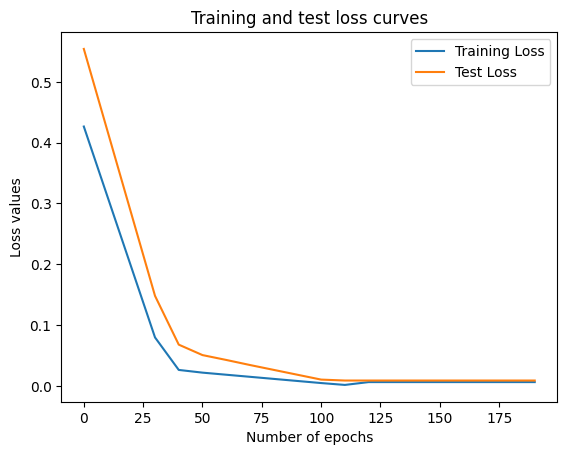

In [68]:
with torch.inference_mode():
  #Plotting the loss curves
  plt.plot(epoch_count, loss_values, label="Training Loss")
  plt.plot(epoch_count, test_loss_values,label="Test Loss")
  plt.title("Training and test loss curves")
  plt.ylabel("Loss values")
  plt.xlabel("Number of epochs")
  plt.legend()

In [61]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6031])), ('bias', tensor([0.5925]))])

In [38]:
weight,bias

(0.6, 0.6)

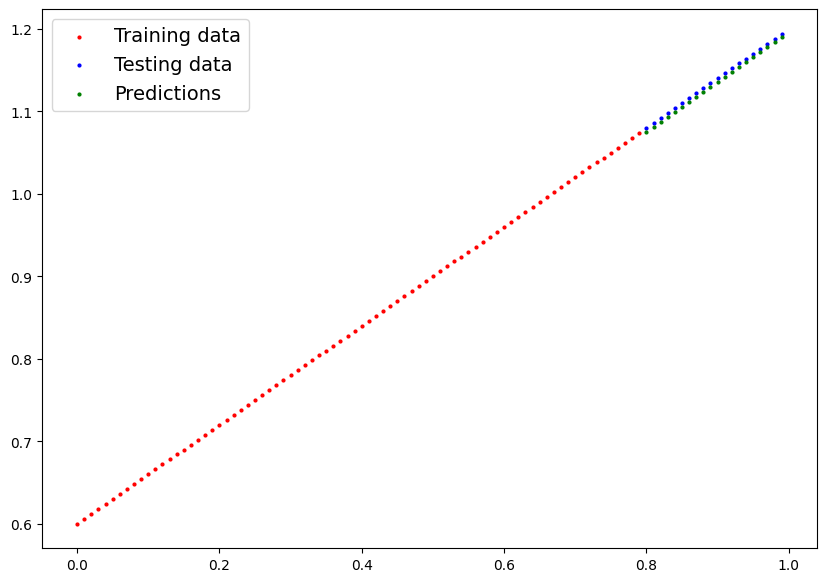

In [62]:
with torch.inference_mode(): #turns of gradient tracking and other stuff
  y_preds_new = model_0(X_test)
plot_predictions(predictions=y_preds_new)

## Saving and Loading a model in PyTorch
1. `torch.save()` - allows users to save PyTorch object in Python's pickle format. Recommended - `torch.save(model.state_dict(), PATH)`
2. `torch.load()` - allows users to load the saved object. 
<br>Recommeded - `model = TheModelClass(*args **kwargs)` <br>
`model.load_state_dict(torch.load(PATH))` <br>
`model.eval()`
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary  

In [73]:
#Saving Model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Model Save path
MODEL_NAME = "linear_regression_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(f"Saving the model at: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving the model at: models/linear_regression_model_0.pth


In [77]:
#Loading Model
print(f"Loading the model at {MODEL_SAVE_PATH}")
model_0_load = LinearRegressionModel()
model_0_load.load_state_dict(torch.load(MODEL_SAVE_PATH))
model_0_load.eval()

Loading the model at models/linear_regression_model_0.pth


LinearRegressionModel()

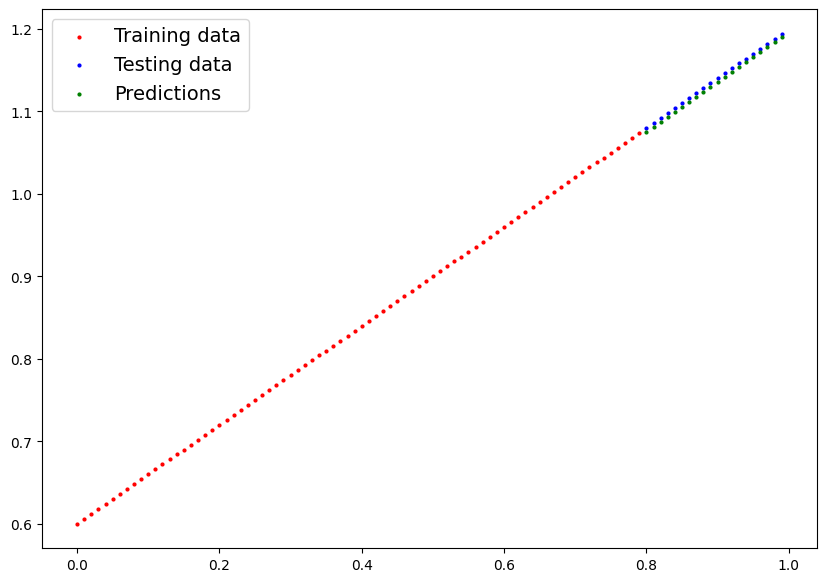

In [78]:
with torch.inference_mode():
  y_preds_load = model_0_load(X_test)
plot_predictions(predictions=y_preds_load)

In [79]:
model_0_load.state_dict()

OrderedDict([('weights', tensor([0.6031])), ('bias', tensor([0.5925]))])

In [80]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6031])), ('bias', tensor([0.5925]))])